In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [31]:
import pandas as pd

# 메모장 파일 불러오기
with open('car.data', 'r', encoding='utf-8') as file:
    data = file.readlines()

# 데이터를 파싱하여 DataFrame 만들기
data_list = []
for line in data:
    columns = line.strip().split(',')  # 쉼표로 열을 분할하고 양쪽 공백 제거
    data_list.append(columns)

# 열 이름 지정
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Label"]  # 실제 열 이름으로 바꿔주세요

# DataFrame 생성 및 열 이름 설정
df = pd.DataFrame(data_list, columns=column_names)

# DataFrame 출력
# print(df)
df.head()

,buying,maint,doors,persons,lug_boot,safety,Label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Label'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df.columns:

    df[i]=le.fit_transform(df[i])

df.head()

,buying,maint,doors,persons,lug_boot,safety,Label
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [35]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Label       0
dtype: int64

In [54]:
#Splitting the data into training and test test
# 지난주처럼 drop해서 해도 되는데, 그럼 넘파이로 바꿔줘야함
# stratify: 훈련세트와 테스트 세트를 나눌때 균형적으로 섞이게 해서 정확도를 높이기 위한 것
    # 샘플링 편향 방지
X = df.iloc[:,0:6].values
y = df.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=0) 

In [55]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [56]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

# 입력 column 6개, 출력층 class개수 4개
# 입력값 두개는 같아야함
model.add(Dense(5,input_shape=(6,),activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 5)                 35        
                                                                 
 dense_45 (Dense)            (None, 5)                 30        
                                                                 
 dense_46 (Dense)            (None, 5)                 30        
                                                                 
 dense_47 (Dense)            (None, 4)                 24        
                                                                 
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


c:\Users\khw\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [73]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 2s 13ms/step - loss: 0.5482 - accuracy: 0.6635 - val_loss: 0.3695 - val_accuracy: 0.6994
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.3548 - accuracy: 0.7004 - val_loss: 0.3495 - val_accuracy: 0.6994
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.3314 - accuracy: 0.7004 - val_loss: 0.3278 - val_accuracy: 0.6994
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.3103 - accuracy: 0.7012 - val_loss: 0.3044 - val_accuracy: 0.6994
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2762 - accuracy: 0.7438 - val_loss: 0.2763 - val_accuracy: 0.7457
Epoch 6/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2449 - accuracy: 0.7786 - val_loss: 0.2228 - val_accuracy: 0.7977
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.7938 - val_loss: 0.2022 - val_accuracy: 0.8035
Epoch 8/100


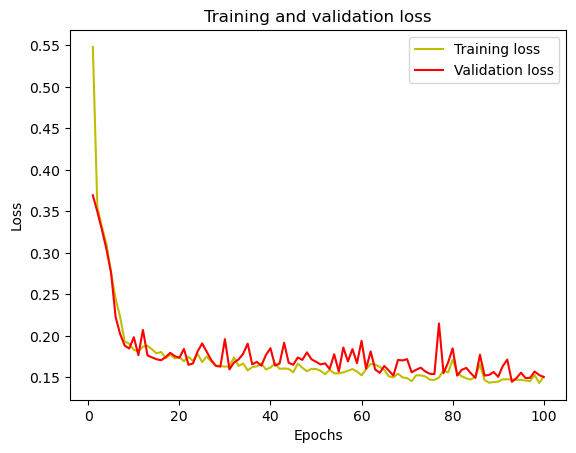

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

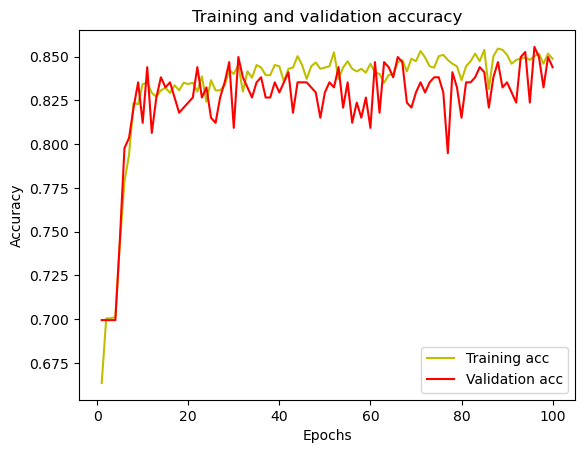

In [75]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [76]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        77
           1       0.50      0.29      0.36        14
           2       0.97      0.90      0.93       242
           3       0.00      0.00      0.00        13

    accuracy                           0.84       346
   macro avg       0.52      0.53      0.51       346
weighted avg       0.84      0.84      0.83       346

[[ 71   0   6   0]
 [ 10   4   0   0]
 [ 23   2 217   0]
 [ 11   2   0   0]]


c:\Users\khw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\khw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\khw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
